In [2]:
from glob import glob

len(glob("../DATASETS/bdd100k/bdd100k_seg/bdd100k/seg/images/train/*")),len(glob("../DATASETS/bdd100k/bdd100k_seg/bdd100k/seg/labels/val/*"))
# !ls ../DATASETS/Cityspaces/images/train/*/*

(7000, 1000)

In [3]:
!rm -r Dataset/BDD

In [4]:
!mkdir Dataset/BDD
!mkdir Dataset/BDD/images
!mkdir Dataset/BDD/masks

!mkdir Dataset/BDD/Test
!mkdir Dataset/BDD/Test/images
!mkdir Dataset/BDD/Test/masks

!cp ../DATASETS/bdd100k/bdd100k_seg/bdd100k/seg/images/train/*  Dataset/BDD/images/
!cp ../DATASETS/bdd100k/bdd100k_seg/bdd100k/seg/labels/train/*  Dataset/BDD/masks/

!cp ../DATASETS/bdd100k/bdd100k_seg/bdd100k/seg/images/val/* Dataset/BDD/Test/images/
!cp ../DATASETS/bdd100k/bdd100k_seg/bdd100k/seg/labels/val/*  Dataset/BDD/Test/masks/

In [5]:
i = !ls Dataset/BDD/images/
l = !ls Dataset/BDD/masks/

test_i = !ls Dataset/BDD/Test/images/
test_l = !ls Dataset/BDD/Test/masks/
len(i), len(l),len(test_i), len(test_l)

(7000, 7000, 1000, 1000)

In [6]:
l[-5:], i[-5:]

(['fe1f2409-5b415eb7_train_id.png',
  'fee92217-63b3f87f_train_id.png',
  'ff1e4d6d-f4d85cfd_train_id.png',
  'ff3d3536-04986e25_train_id.png',
  'ff3da814-c3463a43_train_id.png'],
 ['fe1f2409-5b415eb7.jpg',
  'fee92217-63b3f87f.jpg',
  'ff1e4d6d-f4d85cfd.jpg',
  'ff3d3536-04986e25.jpg',
  'ff3da814-c3463a43.jpg'])

Dataset/BDD/masks/6c771cb8-b6f2eb2c_train_id.png
(720, 1280)
[  0   2   5   6   7   8  10  13 255]


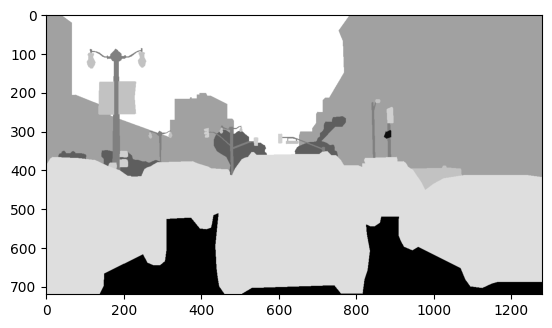

In [7]:
import cv2
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt

l = glob('Dataset/BDD/masks/*.png')
print(l[90])
m = cv2.imread(l[90],0)
print(m.shape)
print(np.unique(m))
plt.imshow(m*75,cmap="gray")
plt.show()

In [8]:
# !pip install tqdm

In [9]:
from tqdm import tqdm

def mask_mapping(path=''):
    for i, filepath in tqdm(enumerate(glob(path))):
        img = cv2.imread(filepath,0)    
        
# 100 = background ids(1,2,4,3,5,6,7,8,9,10,255)
# 101 = road(0)        
# 102 = obstacle ids(11,12,13,14,15,16,17,18 )

        for j in [1,2,4,3,5,6,7,8,9,10,255]:
            img = np.where(img == j , 100, img)            
            
        for j in [11,12,13,14,15,16,17,18]:
            img = np.where(img == j , 102, img)

        for j in [0]:
            img = np.where(img == j , 101, img)

        img = img%100  
        cv2.imwrite(filepath, img)      
        lst= np.unique(img)
        if i<1 or not all(ii < 3 for ii in lst):
            print(np.unique(img))
            print(filepath)

mask_mapping(path='Dataset/BDD/masks/*')
mask_mapping(path='Dataset/BDD/Test/masks/*')

6it [00:00, 24.09it/s]

[0 1 2]
Dataset/BDD/masks/412888ec-9f272f4c_train_id.png


7000it [05:08, 22.66it/s]
3it [00:00, 19.59it/s]

[0 1 2]
Dataset/BDD/Test/masks/9c150253-72086feb_train_id.png


1000it [00:44, 22.69it/s]


In [10]:
len(os.listdir('Dataset/BDD/images/')), len(os.listdir('Dataset/BDD/Test/images/'))

(7000, 1000)

In [11]:
len(os.listdir('Dataset/BDD/masks/')), len(os.listdir('Dataset/BDD/Test/masks/'))

(7000, 1000)

[0. 1. 2.]


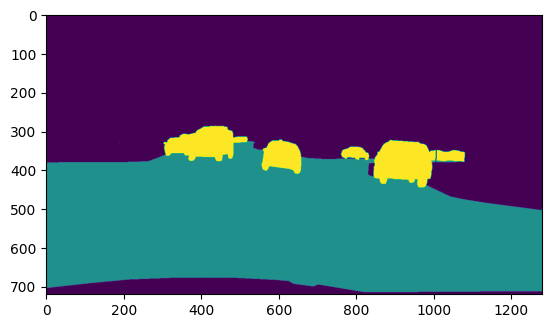

[0. 1. 2.]


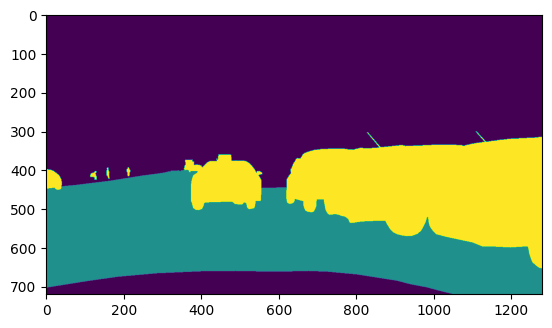

In [12]:
import matplotlib.pyplot as plt
import numpy as np
for i in glob('Dataset/BDD/masks/*')[:2]:
    t = cv2.imread(i,0)
    t = t.astype(np.float32)
    print(np.unique(t))
    plt.imshow(t)
    plt.show()

[0. 1. 2.]


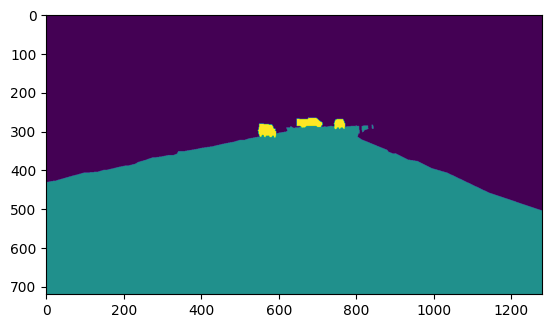

[0. 1. 2.]


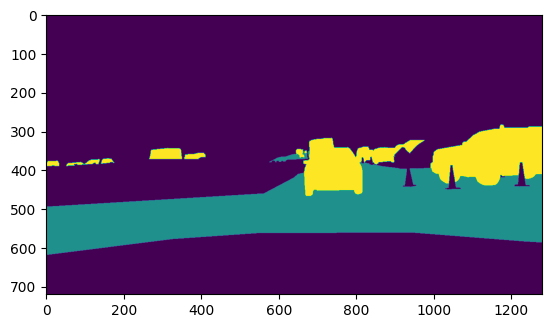

In [13]:
for i in glob('Dataset/BDD/Test/masks/*')[:2]:
    t = cv2.imread(i,0)
    t = t.astype(np.float32)
    print(np.unique(t))
    plt.imshow(t)
    plt.show()